# Prompt Particle Correlations

<i>Last version: Oct. 28, 2020</li>

Many correlations exist between the emitted prompt neutrons and photons and the fission fragments that evaporated them. In this notebook, we demonstrate how to analyze a few of those correlations.

In [1]:
### initializations and import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
%pylab inline

from CGMFtk import histories as fh

Populating the interactive namespace from numpy and matplotlib


In [2]:
### rcParams are the default parameters for matplotlib
import matplotlib as mpl

print ("Matplotbib Version: ", mpl.__version__)

mpl.rcParams['font.size'] = 18
mpl.rcParams['font.family'] = 'Helvetica', 'serif'
#mpl.rcParams['font.color'] = 'darkred'
mpl.rcParams['font.weight'] = 'normal'

mpl.rcParams['axes.labelsize'] = 18.
mpl.rcParams['xtick.labelsize'] = 18.
mpl.rcParams['ytick.labelsize'] = 18.
mpl.rcParams['lines.linewidth'] = 2.

font = {'family' : 'serif',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 18,
        }

mpl.rcParams['xtick.major.pad']='10'
mpl.rcParams['ytick.major.pad']='10'

mpl.rcParams['image.cmap'] = 'inferno'

Matplotbib Version:  3.1.3


## Reading fission events file

First, we again load the history file

In [3]:
hist = fh.Histories ('98252sf.cgmf')

98252sf.cgmf


## Inferring data as a function of the fragment mass

A useful information is to know how many neutrons are emitted as a function of the mass of the fission fragment. Simply typing:

In [4]:
A,nu = hist.nubarA()

provides the range of $A$ values and the average neutron multiplicity for each $A$ value. It then easy to plot the result:

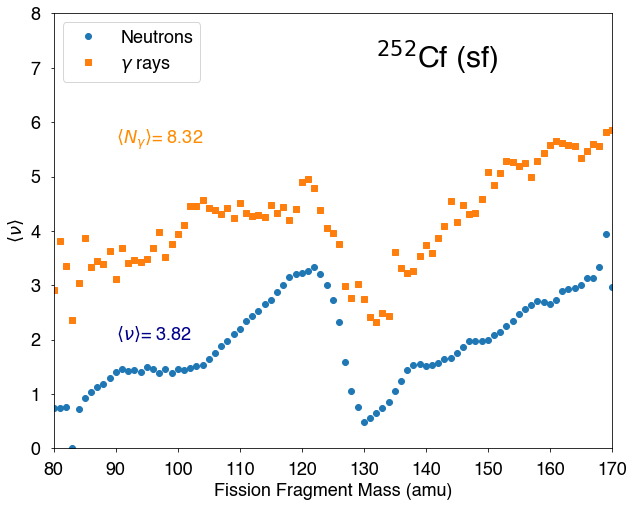

In [7]:
fig=figure(figsize(10,8))

ax=plt.subplot(1,1,1)

x1,y1=hist.nubarA()
plt.plot(x1,y1,'o',label="Neutrons")
plt.text(90,2,r"$\langle \nu \rangle$={0:5.2f}".format(2*hist.nubar()),color="darkblue")

x2,y2=hist.nubargA()
plt.plot(x2,y2,'s',label=r"$\gamma$ rays")
plt.text(90,5.6,r"$\langle N_\gamma \rangle$={0:5.2f}".format(2*hist.nubarg()),color="darkorange")

plt.xlim(80,170)
plt.xlabel("Fission Fragment Mass (amu)")
plt.ylim(0,8)
plt.ylabel(r"$\langle \nu\rangle$")

lg=plt.legend(loc='upper left')
plt.text(132,7,r"$^{252}$Cf (sf)",fontsize=30)
plt.show()

## Function of the Total Kinetic Energy (TKE) of the fragments

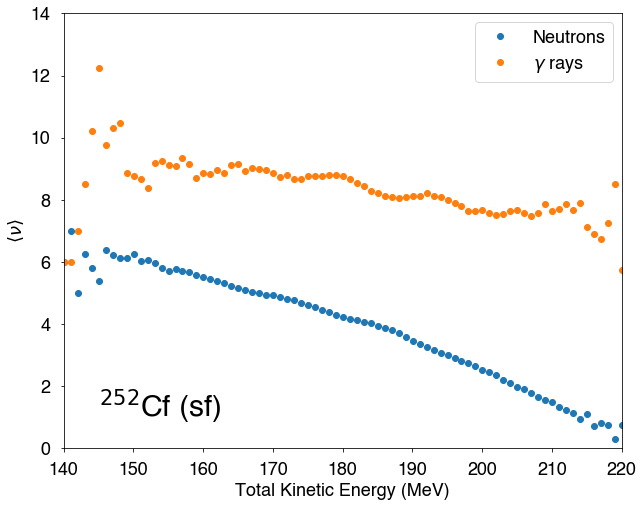

In [14]:
fig=figure(figsize(10,8))

ax=plt.subplot(1,1,1)

x1,y1=hist.nubarTKE()
plt.plot(x1,y1,'o',label="Neutrons")

x2,y2=hist.nubargTKE()
plt.plot(x2,y2,'o',label=r"$\gamma$ rays")

plt.xlim(140,220)
plt.xlabel("Total Kinetic Energy (MeV)")
plt.ylim(0,14)
plt.ylabel(r"$\langle \nu\rangle$")

plt.text(145,1,r"$^{252}$Cf (sf)",fontsize=30)

lg=plt.legend()

plt.show()

## Neutron-neutron angular correlations

For the fission fragment angular distribution with respect to the beam axis/z-axis, there is one option:  afterEmission=True/False.  afterEmission=True uses these angles after neutron emission and afterEmission=False uses these angles before neutron emission.  The default is True.

In [15]:
# calculate cos(theta) between the fragments and z-axis/beam axis
FFangles = hist.FFangles()
bins = np.linspace(-1,1,30)
h,b = np.histogram(FFangles,bins=bins,density=True)
# only light fragments
hLight,b = np.histogram(FFangles[::2],bins=bins,density=True)
# only heavy fragments
hHeavy,b = np.histogram(FFangles[1::2],bins=bins,density=True)

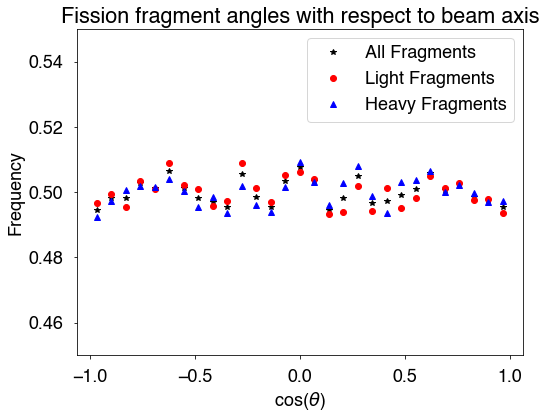

In [16]:
x = 0.5*(b[:-1]+b[1:])
fig = plt.figure(figsize=(8,6))
plt.plot(x,h,'k*',label='All Fragments')
plt.plot(x,hLight,'ro',label='Light Fragments')
plt.plot(x,hHeavy,'b^',label='Heavy Fragments')
plt.xlabel(r'cos($\theta$)')
plt.ylabel('Frequency')
plt.ylim(0.45,0.55)
plt.title('Fission fragment angles with respect to beam axis')
plt.legend()
plt.show()

There are several options when calculating the angles of the neutrons with respect to the beam axis/z-axis.  The first is including a neutron threshold energy with keyword, Eth (given in MeV).  We can also calculate these angles in the lab frame (lab=True, default) or in the center of mass frame of the compound system (lab=False).  Finally, we can include pre-fission neutrons (includePrefission=True, default) or not include them (includePreFission=False).  However, the pre-fission neutrons can only be include in the lab frame.

In [18]:
# calculate the angles between the neutrons and the z-axis/beam axis
nAllLab,nLLab,nHLab = hist.nangles(lab=True) # all neutrons, from the light fragment, from the heavy fragment
nAllCM,nLCM,nHCM = hist.nangles(lab=False) # center of mass frame of the compound

In [19]:
bins = np.linspace(-1,1,30)
hAllLab,b = np.histogram(nAllLab,bins=bins,density=True)
hLightLab,b = np.histogram(nLLab,bins=bins,density=True)
hHeavyLab,b = np.histogram(nHLab,bins=bins,density=True)
hAllcm,b = np.histogram(nAllCM,bins=bins,density=True)
hLightcm,b = np.histogram(nLCM,bins=bins,density=True)
hHeavycm,b = np.histogram(nHCM,bins=bins,density=True)

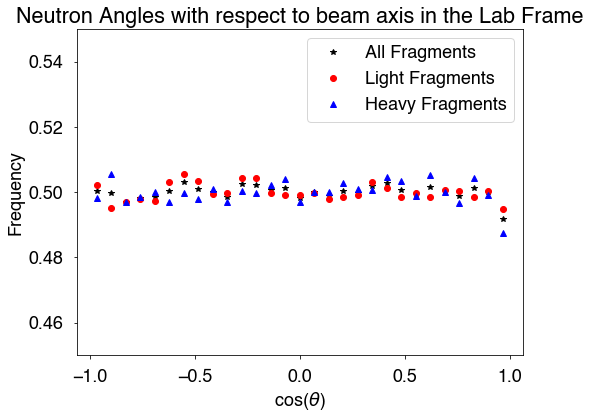

In [20]:
x = 0.5*(b[:-1]+b[1:])
fig = plt.figure(figsize=(8,6))
plt.plot(x,hAllLab,'k*',label='All Fragments')
plt.plot(x,hLightLab,'ro',label='Light Fragments')
plt.plot(x,hHeavyLab,'b^',label='Heavy Fragments')
plt.xlabel(r'cos($\theta$)')
plt.ylabel('Frequency')
plt.ylim(0.45,0.55)
plt.title('Neutron Angles with respect to beam axis in the Lab Frame')
plt.legend()
plt.show()

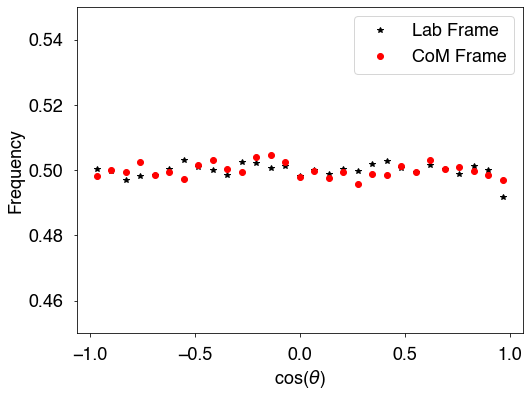

In [21]:
fig = plt.figure(figsize=(8,6))
plt.plot(x,hAllLab,'k*',label='Lab Frame')
plt.plot(x,hAllcm,'ro',label='CoM Frame')
plt.xlabel(r'cos($\theta$)')
plt.ylabel('Frequency')
plt.ylim(0.45,0.55)
plt.legend()
plt.show()

There are again several options that we can use when calculating the angles between all pairs of neutrons (from all framgments) and the ligh fragments, all of which have been seen in the last two examples.  These include, Eth (neutron threshold energy), afterEmission (fission fragment angles are post or pre neutron emission), and includePrefission (to include or not include pre-fission neutrons).

In [23]:
# calculate the angles between the neutrons and the light fragments
nFall,nFLight,nFHeavy = hist.nFangles()
bins = np.linspace(-1,1,30)
hall,b = np.histogram(nFall,bins=bins,density=True)
hlight,b = np.histogram(nFLight,bins=bins,density=True)
hheavy,b = np.histogram(nFHeavy,bins=bins,density=True)

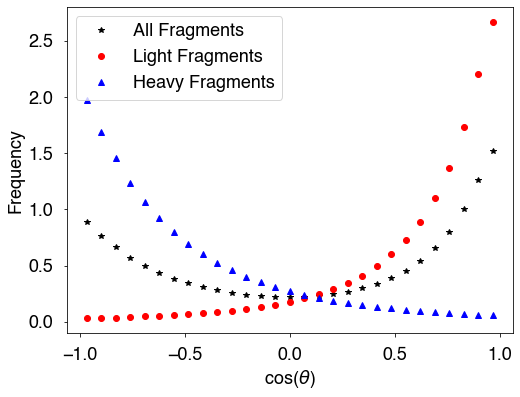

In [24]:
x = 0.5*(b[:-1]+b[1:])
fig = plt.figure(figsize=(8,6))
plt.plot(x,hall,'k*',label='All Fragments')
plt.plot(x,hlight,'ro',label='Light Fragments')
plt.plot(x,hheavy,'b^',label='Heavy Fragments')
plt.xlabel(r'cos($\theta$)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## 2D correlations

It is also straightforward to create 2D plots of correlations between distributions. For instance, if one is interested in plotting the correlation between the total excitation energy of the fragments and their total kinetic energy, one can simply create a 2D histogram

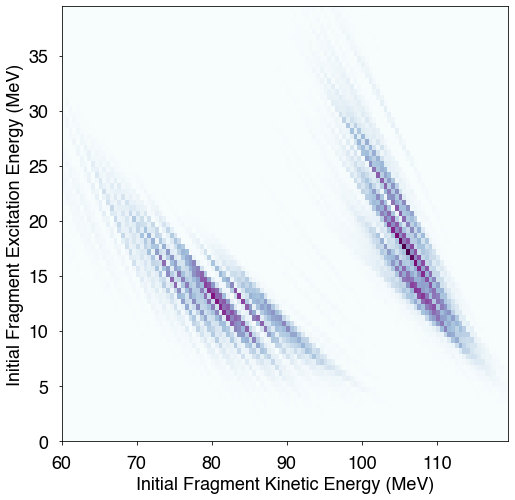

In [25]:
# plot the excitation energy against the fragment kinetic energy

KE = hist.getKEpre()
U  = hist.getU()
bx = np.arange(60,120,0.5)
by = np.arange(0,40,0.5)

fig = plt.figure(figsize=(8,8))

plt.hist2d(KE,U,bins=(bx,by),cmap=plt.cm.BuPu)
#plt.ylim(0,35)
plt.xlabel("Initial Fragment Kinetic Energy (MeV)")
plt.ylabel("Initial Fragment Excitation Energy (MeV)")

plt.show()